**Descriptive Diagrams**

import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact  # widget manipulation
from download import download
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets


Import Data

In [2]:
url1 ='https://www.data.gouv.fr/fr/datasets/r/0b66ca39-1623-4d9c-83ad-5434b7f9e2a4'
path_target = "./covid.csv"
download(url1, path_target, replace=True)
df_covid = pd.read_csv("covid.csv",converters={'date': str})


file_sizes: 100%|██████████████████████████| 6.69M/6.69M [00:00<00:00, 6.85MB/s]
Successfully downloaded file to ./covid.csv


C:\Users\Jihene Belgaied\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#exctraction de colonnes du dataframe df_covid
df_departement = df_covid.loc[:,['date', 'granularite','maille_code','maille_nom','cas_confirmes','hospitalises','deces','gueris']]
#filtrage des données selon le departement
df_departement = df_departement.loc[df_departement['granularite']=="departement",:]



In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_departement.drop('deces', 1), df_departement['deces'],
                                                   test_size=0.2, random_state=5)

In [8]:
df_departement.isna().sum()

date                 0
granularite          0
maille_code          0
maille_nom           0
cas_confirmes    40278
hospitalises      1725
deces              871
gueris            1799
dtype: int64

In [9]:
from sklearn.impute import KNNImputer


In [10]:
knn = KNNImputer(n_neighbors=5, add_indicator=True)


In [11]:
X_train['cas_confirmes'].dtypes

dtype('float64')

In [13]:
num = [col for col in X_train.columns if X_train[col].dtypes != 'O']


In [14]:
X_train[num].head()


,cas_confirmes,hospitalises,gueris
39059,NaN,262.0,1588.0
24384,NaN,2.0,504.0
50487,NaN,166.0,2450.0
8450,NaN,1447.0,2224.0
6002,NaN,68.0,43.0


In [15]:
knn.fit(X_train[num])


KNNImputer(add_indicator=True)

In [16]:
knn.transform(X_train[num])


array([[1.784e+02, 2.620e+02, 1.588e+03, 1.000e+00, 0.000e+00, 0.000e+00],
       [1.760e+01, 2.000e+00, 5.040e+02, 1.000e+00, 0.000e+00, 0.000e+00],
       [1.784e+02, 1.660e+02, 2.450e+03, 1.000e+00, 0.000e+00, 0.000e+00],
       ...,
       [1.332e+02, 2.600e+01, 7.110e+02, 1.000e+00, 0.000e+00, 0.000e+00],
       [1.622e+02, 4.700e+01, 1.025e+03, 1.000e+00, 0.000e+00, 0.000e+00],
       [1.784e+02, 8.000e+01, 5.100e+02, 1.000e+00, 0.000e+00, 0.000e+00]])

In [17]:
pd.DataFrame(knn.transform(X_train[num])).head()


,0,1,2,3,4,5
0,178.4,262.0,1588.0,1.0,0.0,0.0
1,17.6,2.0,504.0,1.0,0.0,0.0
2,178.4,166.0,2450.0,1.0,0.0,0.0
3,178.4,1447.0,2224.0,1.0,0.0,0.0
4,154.2,68.0,43.0,1.0,0.0,0.0


In [18]:
X_test[num].isna().sum()


cas_confirmes    8057
hospitalises      342
gueris            362
dtype: int64

In [20]:
knn.transform(X_test[num])


array([[1.784e+02, 9.460e+02, 1.929e+03, 1.000e+00, 0.000e+00, 0.000e+00],
       [4.060e+01, 6.000e+00, 7.640e+02, 1.000e+00, 0.000e+00, 0.000e+00],
       [1.784e+02, 2.690e+02, 2.195e+03, 1.000e+00, 0.000e+00, 0.000e+00],
       ...,
       [1.784e+02, 2.910e+02, 5.360e+02, 1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00],
       [1.784e+02, 2.050e+02, 1.555e+03, 1.000e+00, 0.000e+00, 0.000e+00]])

In [21]:
pd.DataFrame(knn.transform(X_test[num])).isna().sum().sum()


0

In [4]:
df_departement['date'] = pd.to_datetime(df_departement['date'])
#df2_covid = df2_covid.set_index(['date'])#df_covid['date'] = pd.to_datetime(df_covid['date'])
#df2_covid = df2_covid.set_index(['date'])

In [5]:
#df_departement.maille_nom.unique()

In [6]:
#update
#df_covid[(df_covid['granularite'] == 'departement') & (df_covid['date'] == '2021-04-06')]

Set the current date for the chart : 

In [7]:
current_date = df_departement['date'].max().strftime('%d/%m/%Y')


Create different datasets useful for the charts : 

In [8]:
gb_departement= df_departement[df_departement['date'] == df_departement['date'].max()].reset_index()
current_date = gb_departement['date'].max().strftime('%d/%m/%Y')
#hospitalisees total = hospitalises + gueris
data_ratio_hospitalises = (gb_departement['deces'] / (gb_departement['hospitalises'] + gb_departement['gueris'])) * 100
data_hospitalises = gb_departement['hospitalises'] + gb_departement['gueris']
data_deces = gb_departement['deces']
data_depcode = gb_departement['maille_nom']


**Ratio des descès par rapport au nombre d'hospitalisations à la date updated :** 

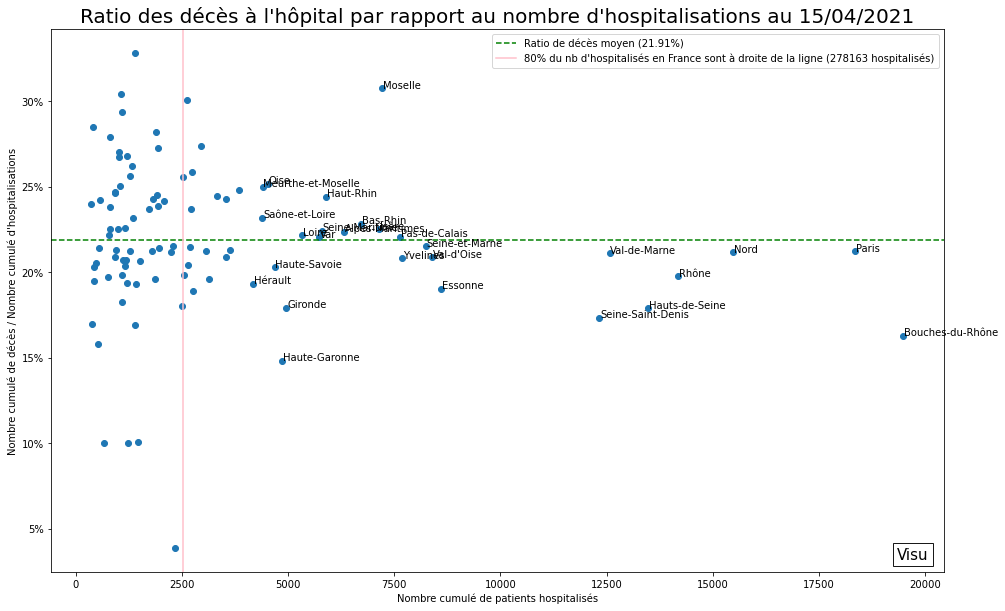

In [9]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(16, 10))

plt.title(f"Ratio des décès à l'hôpital par rapport au nombre d'hospitalisations au {current_date}", fontsize=20)
plt.ylabel("Nombre cumulé de décès / Nombre cumulé d'hospitalisations")
plt.xlabel("Nombre cumulé de patients hospitalisés")

nbhospitalises_80p = data_hospitalises.sum() * 0.80
min_value_80p = data_hospitalises.loc[data_hospitalises[data_hospitalises.sort_values(ascending=False).cumsum() <= nbhospitalises_80p].index].min()

for i, txt in enumerate(data_depcode):
    if (data_hospitalises[i] > data_hospitalises.max() * 0.20):
    #if (data_hospitalises[i] > min_value_80p):
        ax.annotate(txt, (data_hospitalises[i], data_ratio_hospitalises[i]), xytext=(data_hospitalises[i] + 20, data_ratio_hospitalises[i]))        

plt.axhline(data_ratio_hospitalises.mean(), color='green', linestyle='--', label=f'Ratio de décès moyen ({data_ratio_hospitalises.mean():.2f}%)')

plt.axvline(min_value_80p, color='pink', linestyle='-', label=f"80% du nb d'hospitalisés en France sont à droite de la ligne ({nbhospitalises_80p:.0f} hospitalisés)")

ax.scatter(data_hospitalises, data_ratio_hospitalises)

ax.annotate('Visu',xy=(1, 0), xytext=(-15, 10), fontsize=15,
    xycoords='axes fraction', textcoords='offset points',
    bbox=dict(facecolor='white', alpha=0.9),
    horizontalalignment='right', verticalalignment='bottom')

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
plt.legend()

current_date_file = gb_departement['date'].max().strftime('%Y%m%d')
plt.savefig('covid19-comparatif-departements-'+str(current_date_file)+'.png')

**Nombre de décès à l'hôpital par rapport au nombre d'hospitalisations à la date updated**

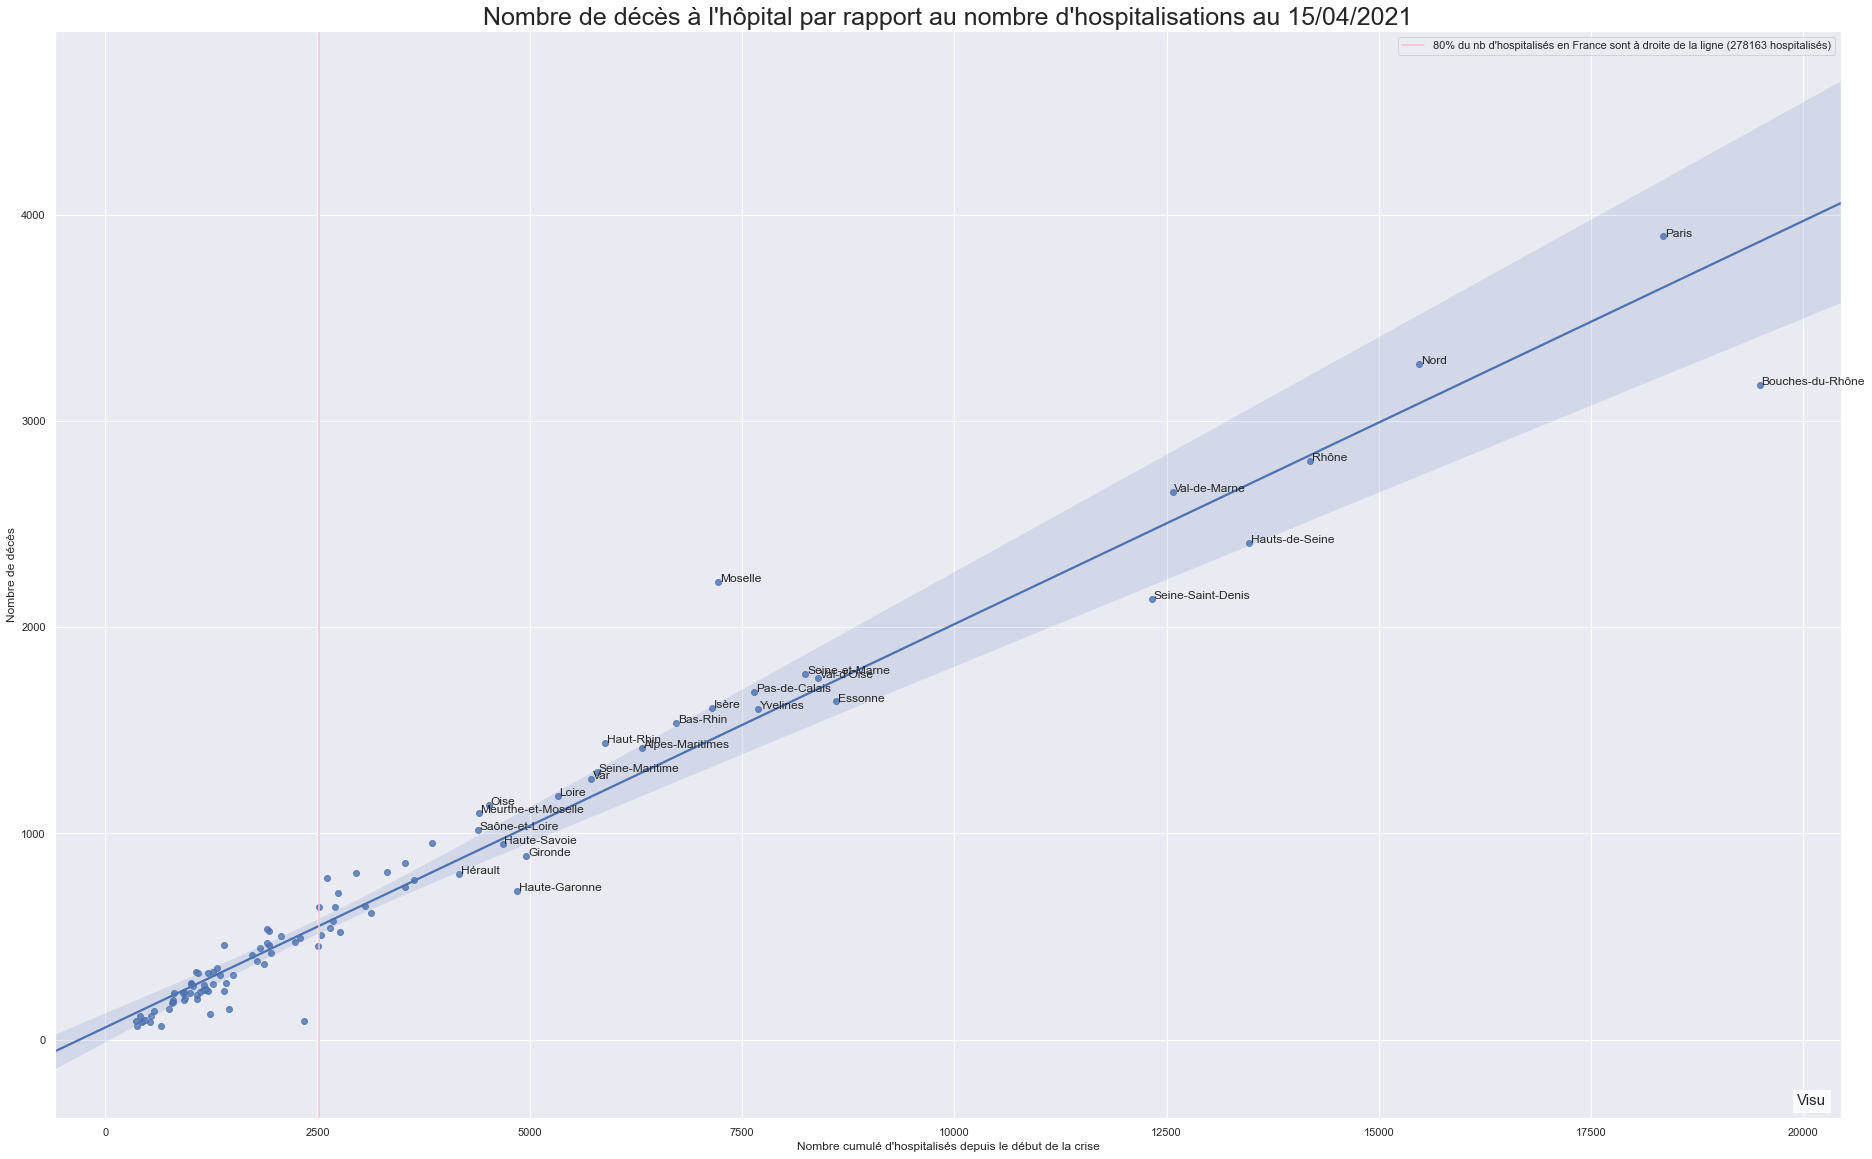

In [10]:
import seaborn as sns; sns.set(color_codes=True)

plt.figure(figsize=(32, 20))

plt.title(f"Nombre de décès à l'hôpital par rapport au nombre d'hospitalisations au {current_date}", fontsize=25)
# Set x-axis label

ax = sns.regplot(x=data_hospitalises, y=data_deces, ci=99.9, truncate=False)

ax.set(xlabel="Nombre cumulé d'hospitalisés depuis le début de la crise", ylabel='Nombre de décès')
plt.axvline(min_value_80p, color='pink', linestyle='-', label=f"80% du nb d'hospitalisés en France sont à droite de la ligne ({nbhospitalises_80p:.0f} hospitalisés)")
plt.legend()

for i, txt in enumerate(data_depcode):
    if (data_hospitalises[i] > data_hospitalises.max() * 0.20):
        ax.annotate(txt, (data_hospitalises[i], data_deces[i]), xytext=(data_hospitalises[i] + 20, data_deces[i]))      
        #ax.annotate(txt, (data_hospitalises[i], data_hospitalises[i]))      
        
ax.annotate('Visu', xy=(1, 0), xytext=(-15, 10), fontsize=15,
    xycoords='axes fraction', textcoords='offset points',
    bbox=dict(facecolor='white', alpha=0.8),
    horizontalalignment='right', verticalalignment='bottom')
        
plt.savefig('covid19-comparatif-departements-regplot-'+str(current_date_file)+'.png')

Widget displays number of confirmed cases per month

In [11]:
df_departement['date'] = pd.to_datetime(df_departement['date']).dt.to_period('M')
sorted_department_df =df_departement.sort_values('cas_confirmes', ascending= True)
sorted_department_df

,date,granularite,maille_code,maille_nom,cas_confirmes,hospitalises,deces,gueris
5,2020-01,departement,DEP-16,Charente,0.0,NaN,NaN,NaN
308,2020-03,departement,DEP-19,Corrèze,0.0,NaN,NaN,NaN
309,2020-03,departement,DEP-23,Creuse,0.0,NaN,NaN,NaN
310,2020-03,departement,DEP-24,Dordogne,0.0,NaN,NaN,NaN
311,2020-03,departement,DEP-26,Drôme,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...
50750,2021-04,departement,DEP-971,Guadeloupe,NaN,92.0,214.0,986.0
50751,2021-04,departement,DEP-972,Martinique,NaN,114.0,66.0,544.0
50752,2021-04,departement,DEP-973,Guyane,NaN,41.0,91.0,2296.0
50753,2021-04,departement,DEP-974,La Réunion,NaN,148.0,147.0,1311.0


In [12]:
def bubble_chart(n,month):
    sorted_department_df =df_departement.sort_values('cas_confirmes', ascending= False)
    sorted_department_df = sorted_department_df[sorted_department_df.date == month]
    fig = px.scatter(sorted_department_df.head(n), x="maille_nom", y="cas_confirmes", size="cas_confirmes", color="maille_nom",
               hover_name="maille_nom", size_max=60)
    fig.update_layout(
    title="Les" + " " + str(n) + " "+ "départements les plus touhcés par le coronavirus",
    xaxis_title="Départements",
    yaxis_title="Cas confirmés",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=10,month=df_departement.date.unique())

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'


interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Dropdown(description='month', opt…

Ratio Death:Confirmed 

In [13]:
#calculating the Death:Confirmed
df_departement['Death to Confirmed Ratio'] = round(df_departement.deces/df_departement.cas_confirmes* 100,2)
fig = go.FigureWidget( layout=go.Layout() )
def top_ratio(n, month):
    departement_data_ratio = df_departement.sort_values(by = 'Death to Confirmed Ratio', ascending = False)
    departement_data_ratio= departement_data_ratio[departement_data_ratio.date == month]
    fig = px.scatter(departement_data_ratio.head(n), x = 'maille_nom', y = 'Death to Confirmed Ratio', color = 'maille_nom', size = 'Death to Confirmed Ratio',
                    hover_data= ['cas_confirmes','deces'], size_max = 60)
    fig.update_layout(
    title="Les" + " " + str(n) + " "+ "départements dont le ratio déces par cas confirmés est le plus élevé",
    xaxis_title="Départements",
    yaxis_title="ratio déces par cas confirmés",
    width = 700
    )
    fig.show()
widgets.interact(top_ratio, n = 10,month=df_departement.date.unique())
ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Dropdown(description='month', opt…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …